In [1]:
#任务：
#基于examdata.csv数据，建立逻辑回归模型，预测Exam1 = 75,Exam = 60时，该同学在Exam3是passed or failed
#建立二阶边界，提高模型准确度|

In [31]:
#加载数据
import pandas as pd
import numpy as np
data = pd.read_csv('examdata.csv')
data.head(5)


,Exam1,Exam2,Pass
0,34.62366,78.02469,0
1,30.28671,43.89500,0
2,35.84741,72.90220,0
3,60.18260,86.30855,1
4,79.03274,75.34438,1


Text(0, 0.5, 'Exam2')

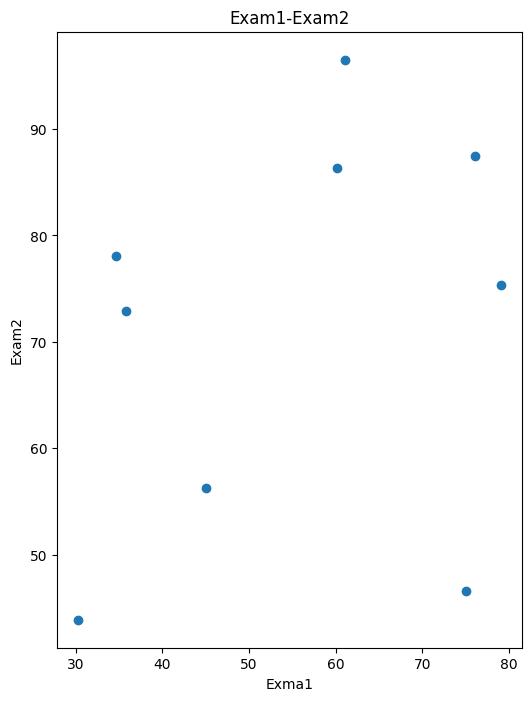

In [32]:
# 可视化数据
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(6,8))
plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exma1')
plt.ylabel('Exam2')
# plt.show()

In [33]:
#添加便签
mask = data.loc[:,'Pass']==1
# mask

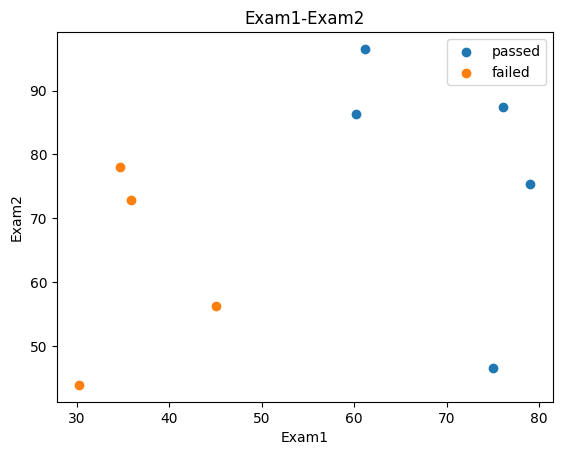

In [34]:
fig2 =plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])

plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [35]:
#定义x,y
X= data.drop('Pass',axis=1)
X1 = data.loc[:,'Exam1']
X2 = data.loc[:,'Exam2']

In [36]:
y = data.loc[:,'Pass']

In [37]:
#模型的建立与训练
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X,y)

LogisticRegression()

In [38]:
#预测结果，评估模型表现
y_predict =LR.predict(X)

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
accuracy

1.0

In [40]:
#预测结果 exam1 =70,exam2=65
y_test = LR.predict([[70,65]])
y_test

D:\download\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [41]:
#查看边界曲线
#模型的系数(对应theta1,theta2)
theta1,theta2=LR.coef_[0][0],LR.coef_[0][1]

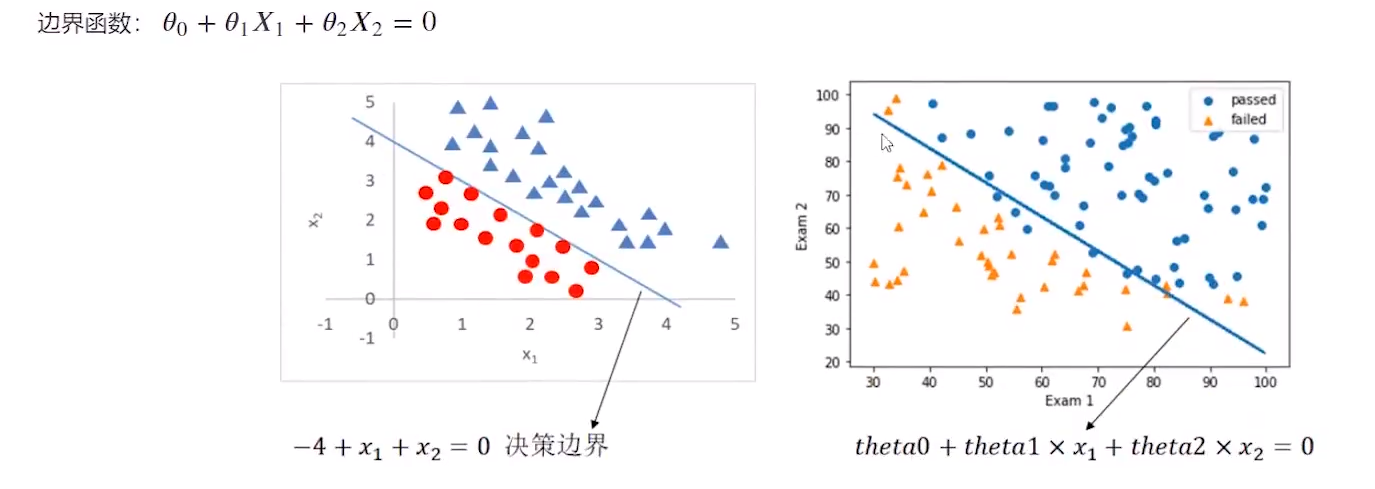


In [42]:
#查看截距(对应theta0)
theta0=LR.intercept_

In [43]:
#用边界曲线去求解预测值
X2_new = -(theta0+theta1*X1)/theta2
print(X2_new)

0    122.113561
1    134.494009
2    118.620190
3     49.151884
4     -4.658557
5     92.255068
6     46.514022
7      6.782828
8      3.716826
Name: Exam1, dtype: float64


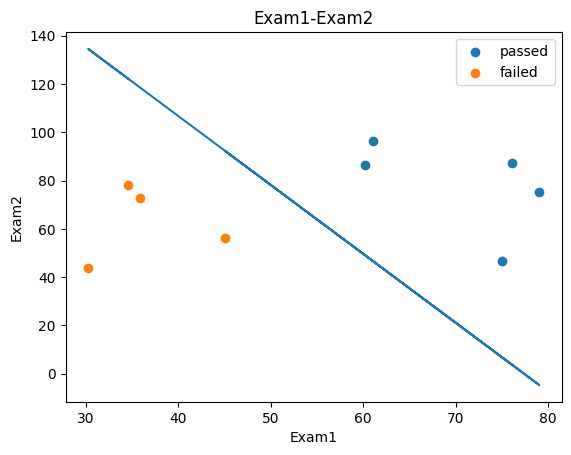

In [46]:
fig3 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
# plt.plot(X1,X2_new)
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [47]:
#建立一个二阶的边界


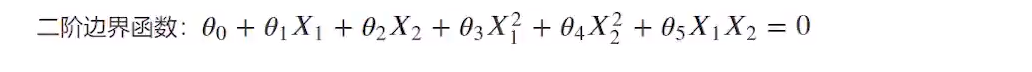

In [48]:
# 创建新的数据集
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2

In [49]:
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

         X1        X2         X1_2         X2_2        X1_X2
0  34.62366  78.02469  1198.797832  6087.852250  2701.500338
1  30.28671  43.89500   917.284803  1926.771025  1329.435135
2  35.84741  72.90220  1285.036804  5314.730765  2613.355053
3  60.18260  86.30855  3621.945343  7449.165803  5194.272941
4  79.03274  75.34438  6246.173992  5676.775598  5954.672795
5  45.08328  56.31637  2032.502136  3171.533530  2538.926677
6  61.10666  96.51143  3734.023896  9314.456121  5897.491139
7  75.02475  46.55401  5628.713113  2167.275847  3492.702962
8  76.09879  87.42057  5791.025839  7642.356059  6652.599598


In [50]:
#再创建一个新的模型的实例，并进行训练
LR2 = LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression()

In [51]:
#数据进行预测
y2_predict = LR2.predict(X_new)

In [52]:
#查看新模型的一个表现（评估模型好坏）
accuracy2 = accuracy_score(y,y2_predict)
accuracy2

1.0

In [53]:
#画这个图像


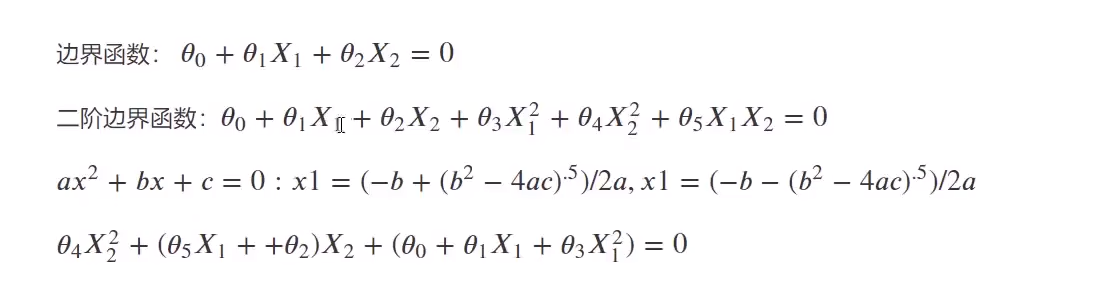

In [55]:
LR2.coef_

array([[-0.19495029, -0.28340803,  0.00360696,  0.00143215,  0.00336675]])

In [57]:
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
print(theta0,theta1,theta2,theta3,theta4,theta5)

[-0.00846596] -0.19495029443882328 -0.2834080291031357 0.00360695860657016 0.0014321529584900186 0.003366754607668061


In [58]:
#计算上述的a,b,c
a = theta4
b= theta5*X1+theta2
c = theta0+theta1*X1+theta3*X1*X1

In [63]:
#新的边界是
X2_new_boundary = (-b+np.sqrt(np.abs((b*b-4*a*c))/(2*a)

SyntaxError: unexpected EOF while parsing (190853343.py, line 2)

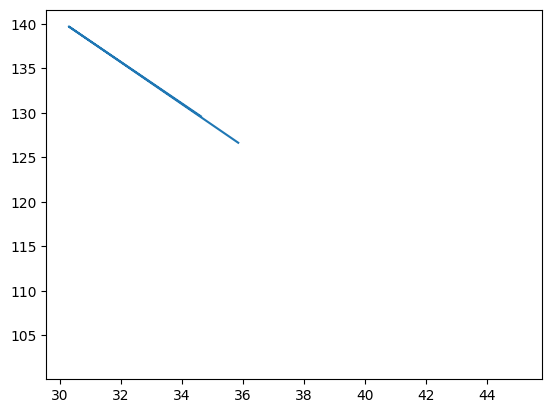

In [64]:
#可视化新的边界、
fig4 = plt.figure()
plt.plot(X1,X2_new_boundary)
plt.show()

In [65]:
#因此 可视化之前需要将X1先排序
X1_new = X1.sort_values()
print(X1,X1_new)

0    34.62366
1    30.28671
2    35.84741
3    60.18260
4    79.03274
5    45.08328
6    61.10666
7    75.02475
8    76.09879
Name: Exam1, dtype: float64 1    30.28671
0    34.62366
2    35.84741
5    45.08328
3    60.18260
6    61.10666
7    75.02475
8    76.09879
4    79.03274
Name: Exam1, dtype: float64


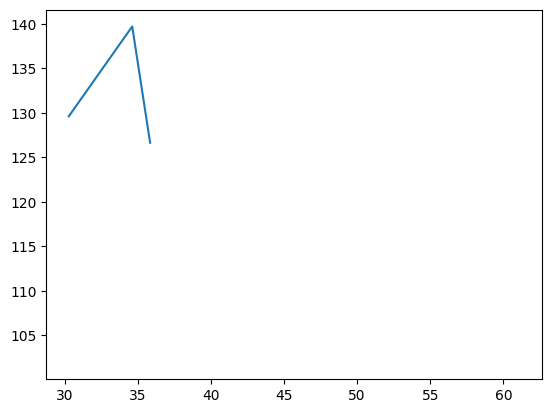

In [66]:
fig4 = plt.figure()
plt.plot(X1_new,X2_new_boundary)
plt.show()